### Create design matrix with IBL mice
#### Normalize data across animals within a bin

In [1]:
"""
IMPORTS
"""
import numpy as np
from oneibl.onelight import ONE
import numpy.random as npr
import json
from sklearn import preprocessing
from collections import defaultdict
import wget
from zipfile import ZipFile
import os
import pandas as pd
from preprocessing_utils_session_ines import get_animal_name, load_animal_list, load_animal_eid_dict, \
    get_all_unnormalized_data_this_session, create_train_test_sessions, bin_frac

npr.seed(65)

In [2]:
"""
Load data
"""

data_dir = '/home/ines/repositories/representation_learning_variability/DATA/GLMHMM/'
#data_dir = '/home/ines/repositories/learning_variability/HMMs/Zoes_model/data/ibl/partially_processed/'
# Load animal list/results of partial processing:
animal_list = load_animal_list(
    data_dir + 'animal_list.npz')
animal_eid_dict = load_animal_eid_dict(
    data_dir + 'animal_eid_dict.json')


In [3]:
"""
Create folders to save processed data
"""
#data_dir = '/home/ines/repositories/learning_variability/HMMs/Zoes_model/data/ibl-behavioral-data-Dec-2019/'
# Create directories for saving data:
processed_ibl_data_path = data_dir + "data_for_cluster/"
if not os.path.exists(processed_ibl_data_path):
    os.makedirs(processed_ibl_data_path)
# Also create a subdirectory for storing each animal's bin data:
if not os.path.exists(processed_ibl_data_path + "data_by_bin/"):
    os.makedirs(processed_ibl_data_path + "data_by_bin/")

In [4]:
# Require that each animal has at least 10 sessions (=2700 trials) of data:
req_num_sessions = 10  # 30*90 = 2700
for animal in animal_list:
    num_sessions = len(animal_eid_dict[animal])
    if num_sessions < req_num_sessions:
        animal_list = np.delete(animal_list,
                                np.where(animal_list == animal))

In [5]:
#all_trials.to_csv(trials_dir + "learning_private2_one.csv")

In [10]:
trials_dir = '/home/ines/repositories/representation_learning_variability/DATA/'
all_trials = pd.read_csv(trials_dir + "learning_private_one.csv")  
bin_num = 10
#all_trials = bin_frac(all_trials, bin_num)

/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
len(all_trials)

6217420

ZFM-05234 9
PL038 9
ZFM-05232 9
ZFM-05231 9
ZFM-04310 9
ZFM-04309 9
UCLA057 9
UCLA056 9
UCLA055 9
NR_0023 9
UCLA048 9
UCLA051 9
UCLA054 9
UCLA049 9
KS097 9
NR_0021 9
UCLA052 9
UCLA053 9
ZFM-04308 9
ZFM-04306 9
KS093 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS090 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS096 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS095 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


SWC_067 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS094 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS091 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS092 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA050 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


SWC_065 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ZFM-04307 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


SWC_066 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NR_0019 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ZFM-03843 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NR_0020 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA029 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS089 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PL032 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA045 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA044 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA043 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS088 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA046 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ZFM-03841 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PL033 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS087 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS086 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS083 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA047 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA030 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


SWC_063 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA032 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PL031 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ZFM-03846 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ZFM-03844 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ZFM-03842 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


SWC_064 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS085 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS078 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PL029 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA033 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


PL028 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA036 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS084 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA037 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA035 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA034 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA024 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NYU-55 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NR_0018 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NR_0017 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS080 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS079 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS075 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


UCLA031 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS082 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


SWC_062 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS071 9


/home/ines/miniconda3/envs/glmhmm/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KS073 9


KeyboardInterrupt: 

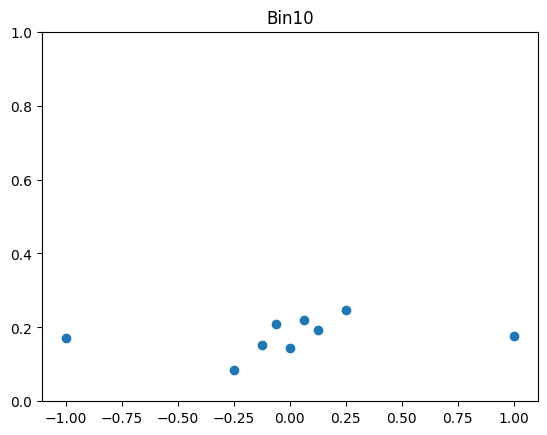

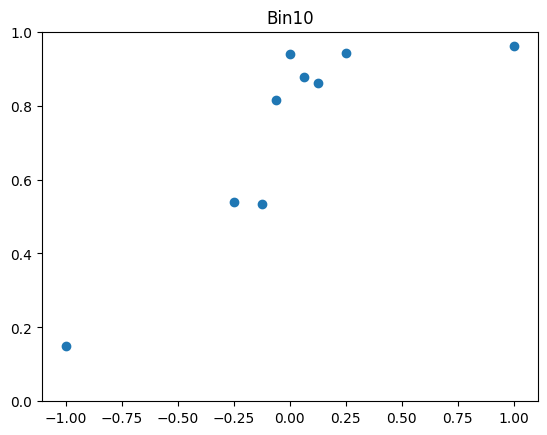

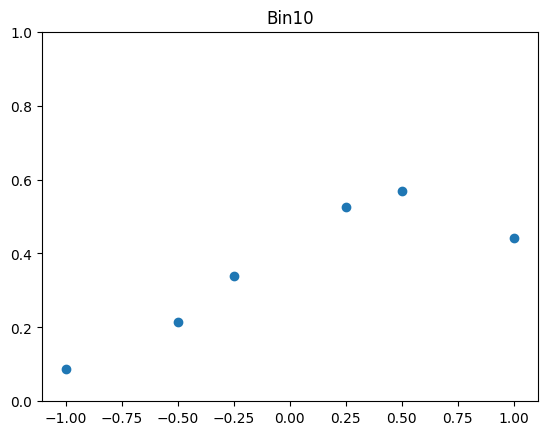

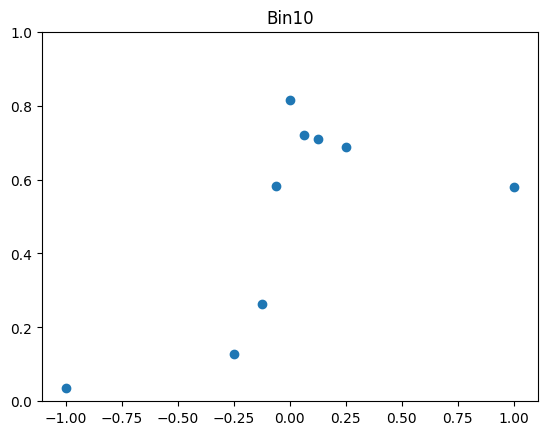

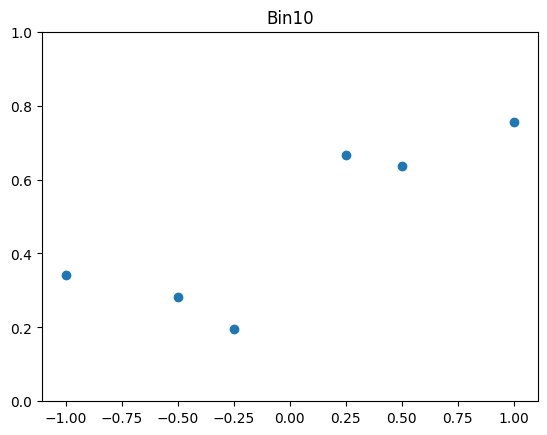

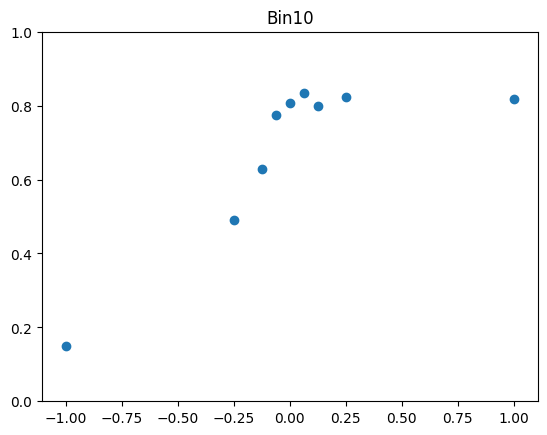

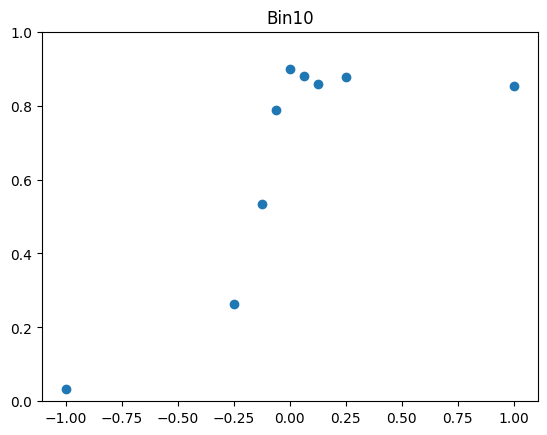

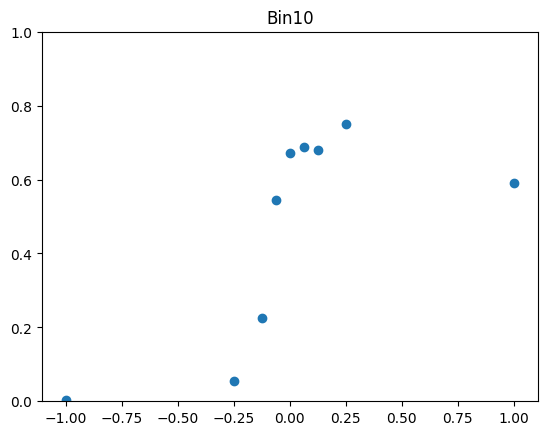

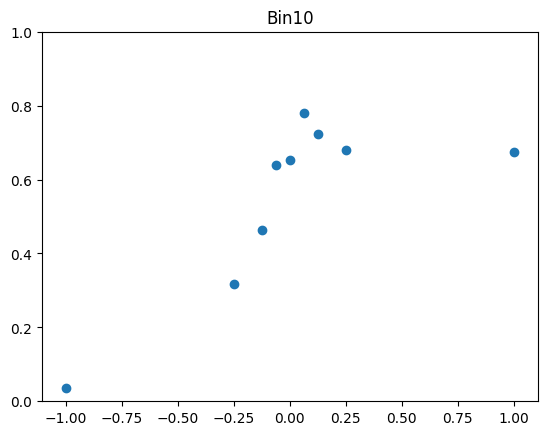

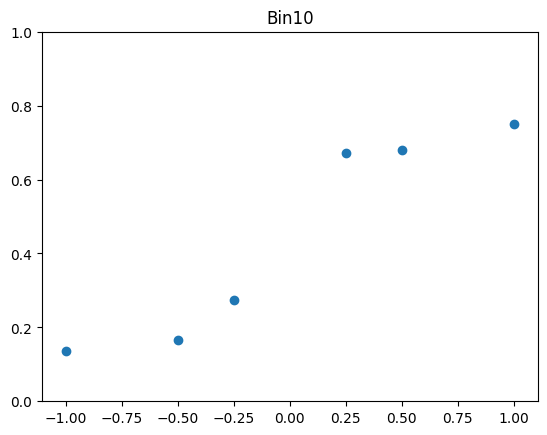

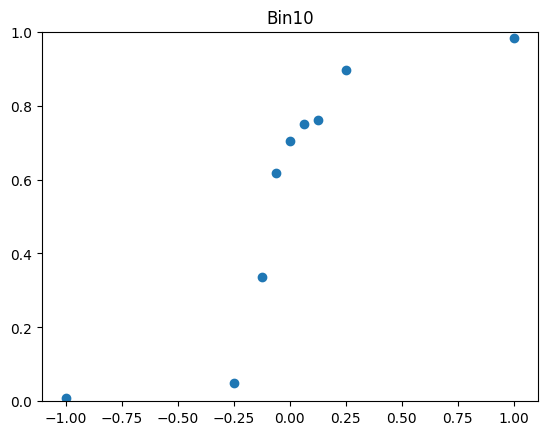

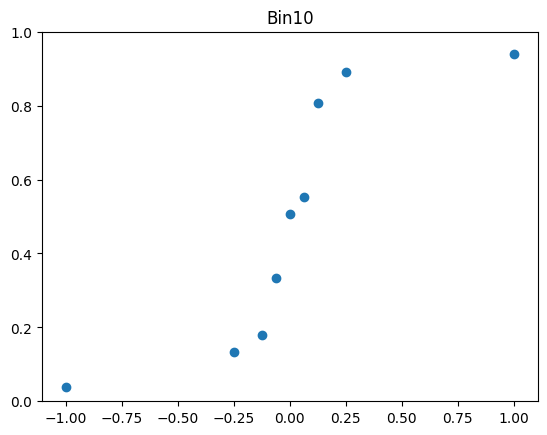

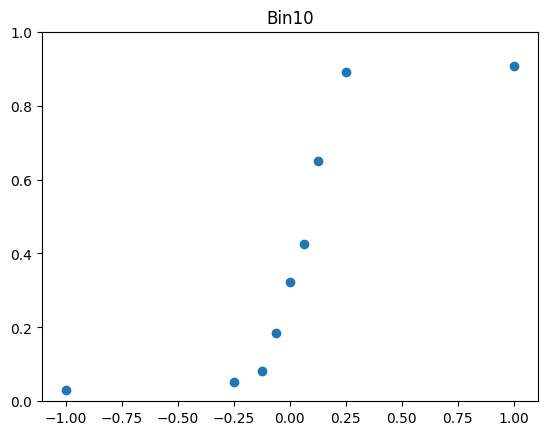

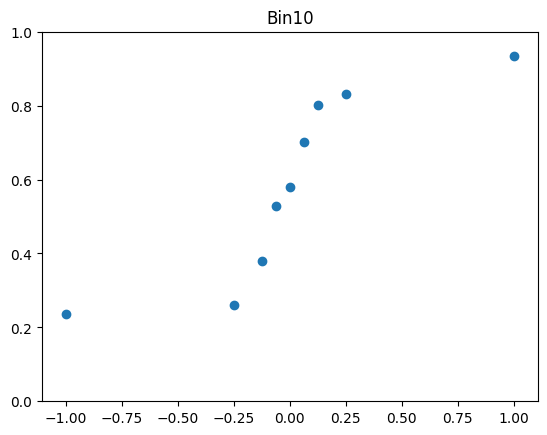

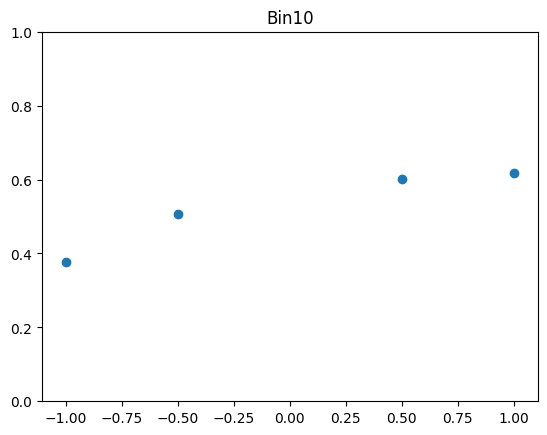

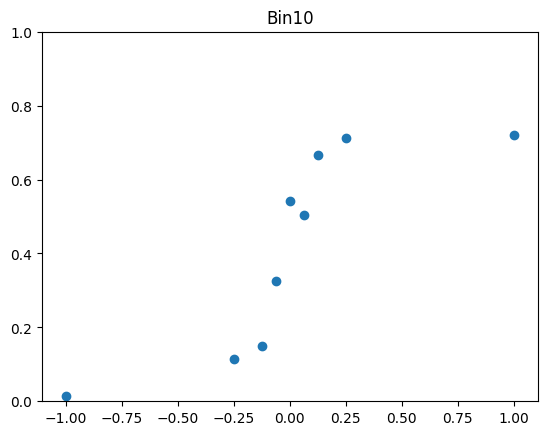

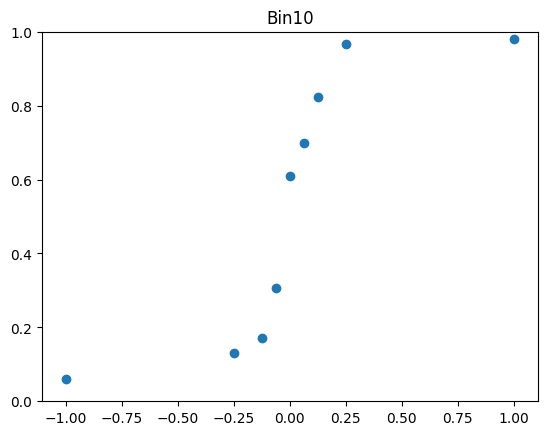

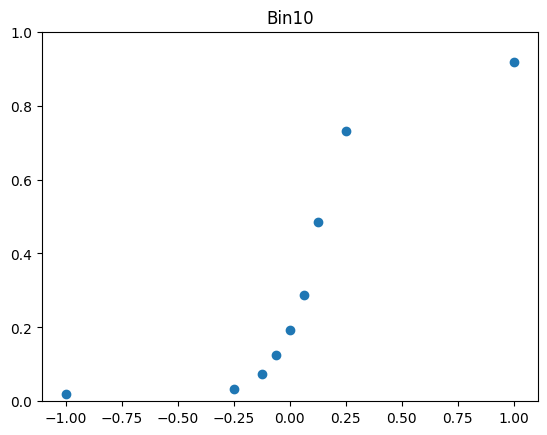

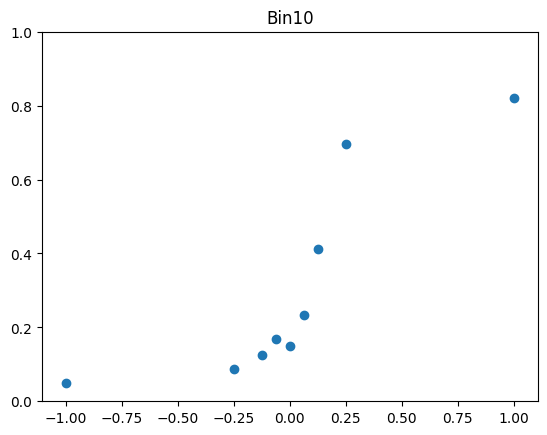

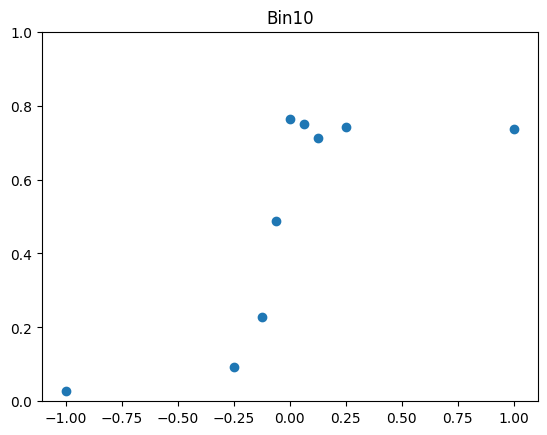

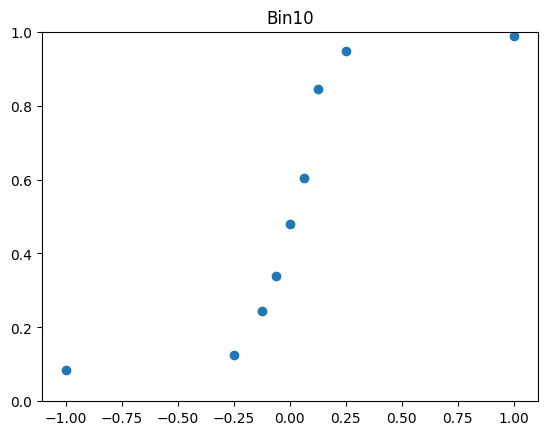

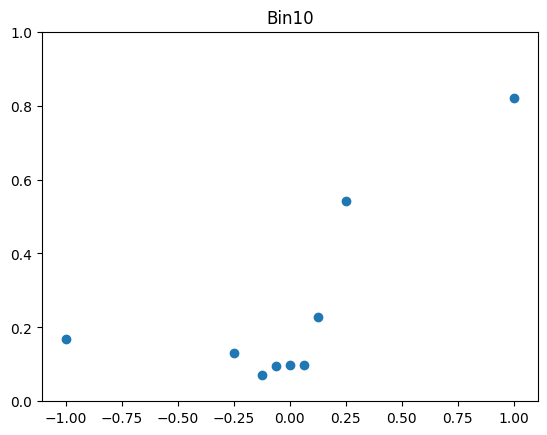

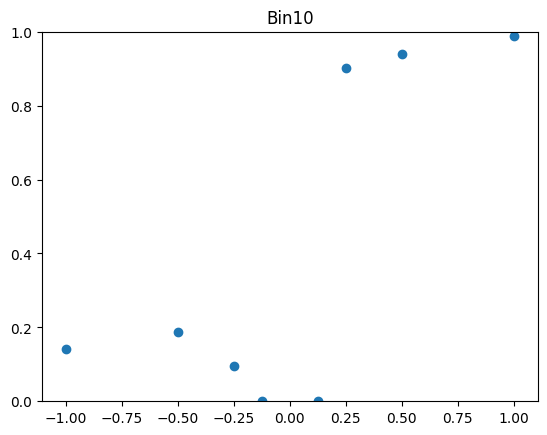

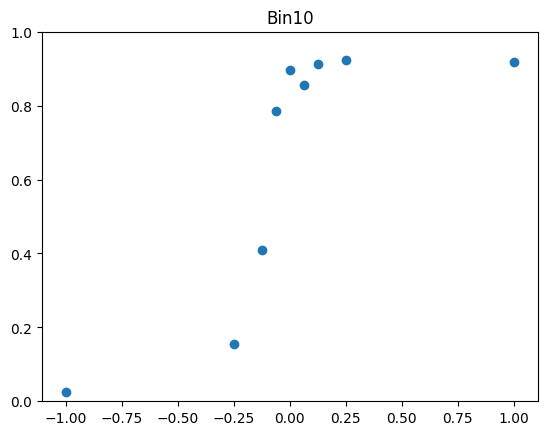

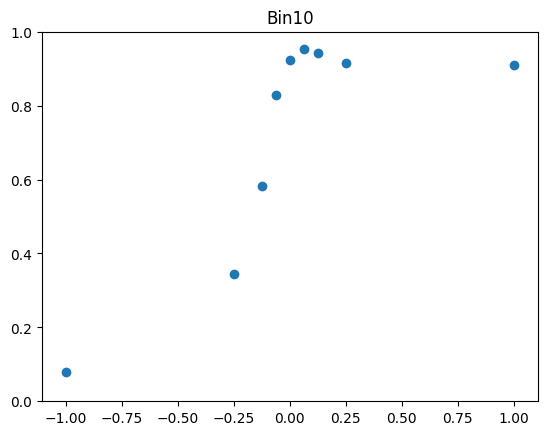

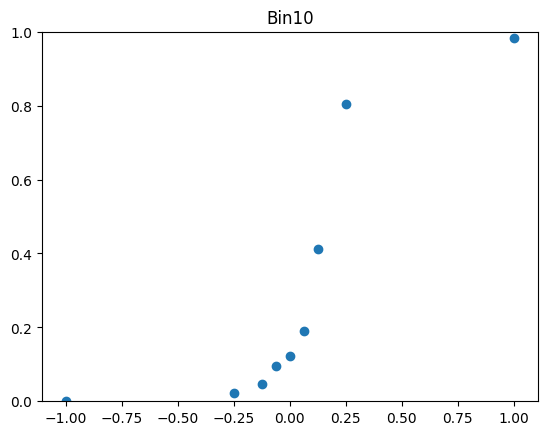

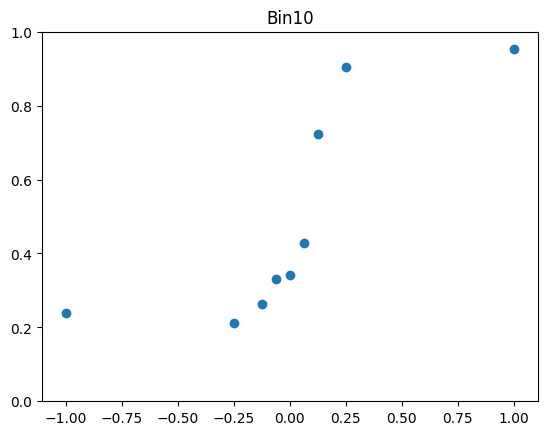

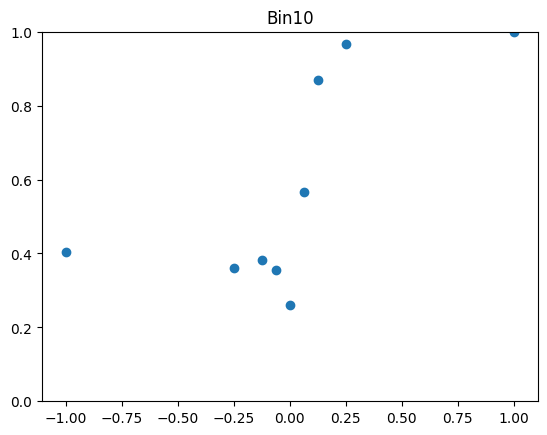

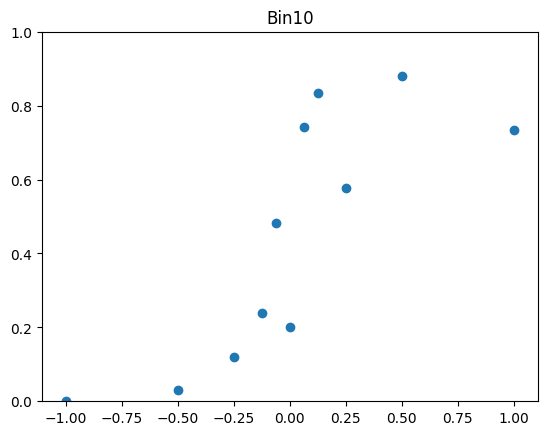

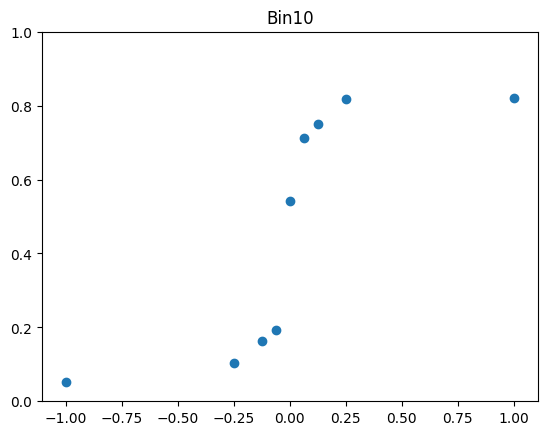

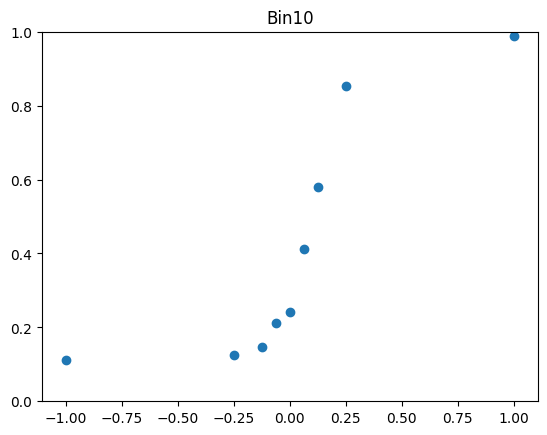

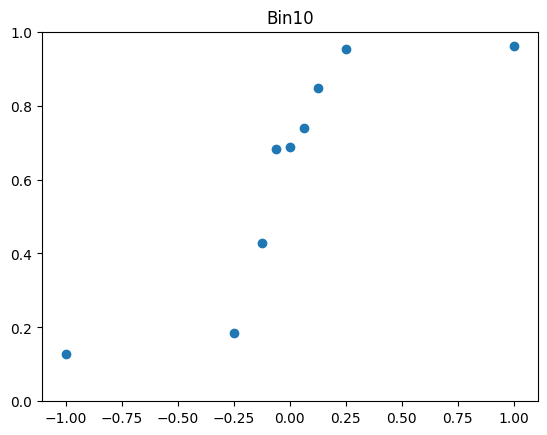

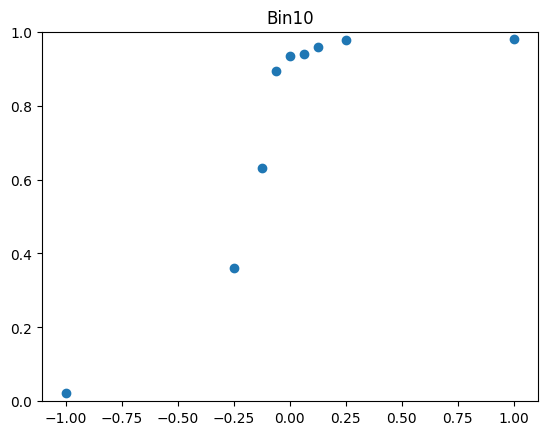

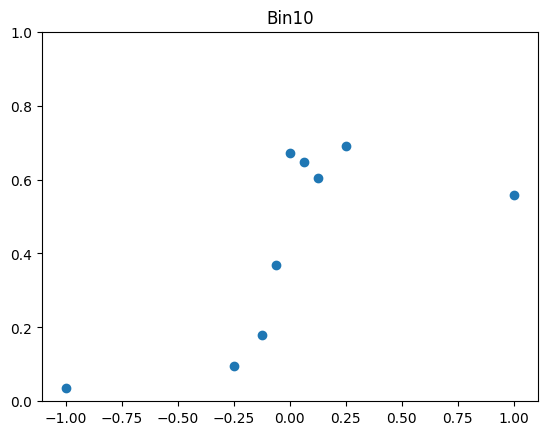

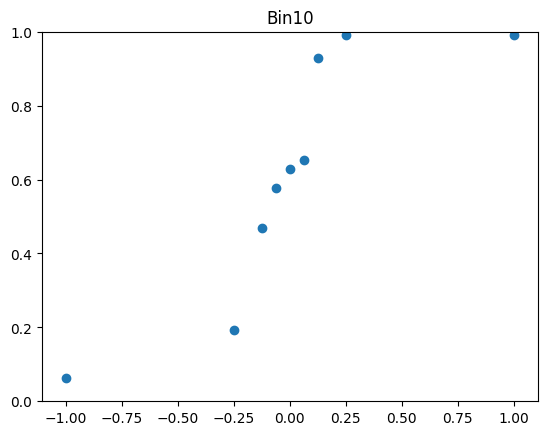

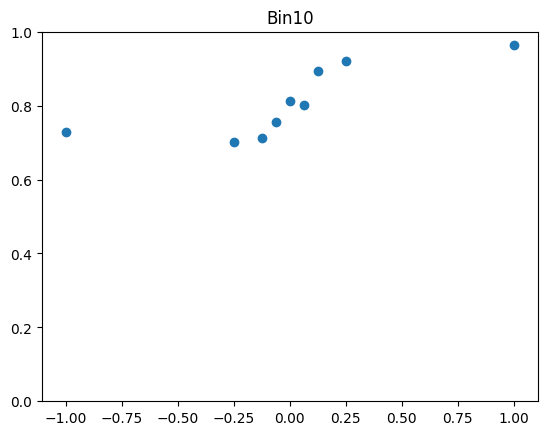

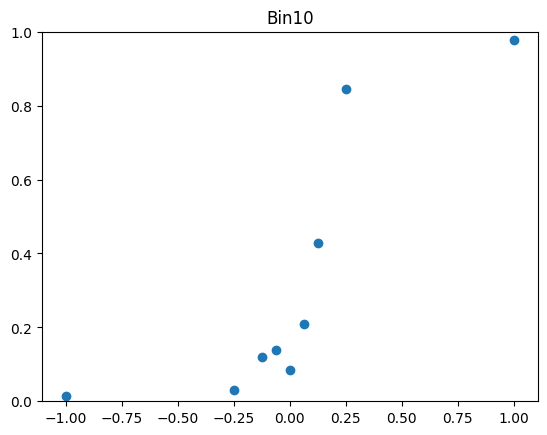

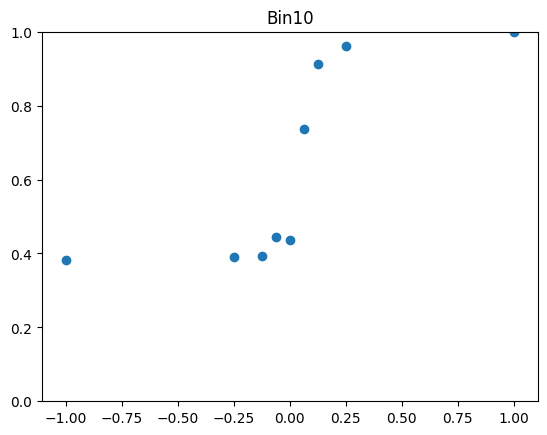

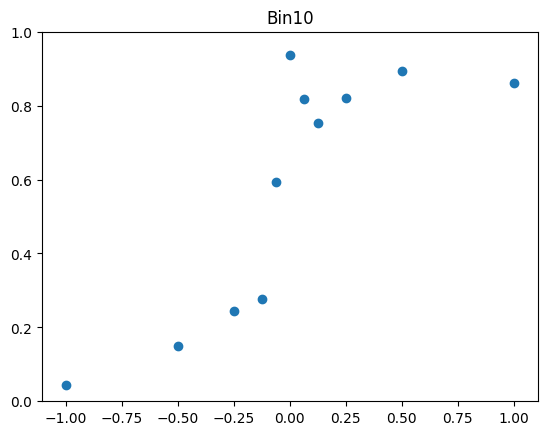

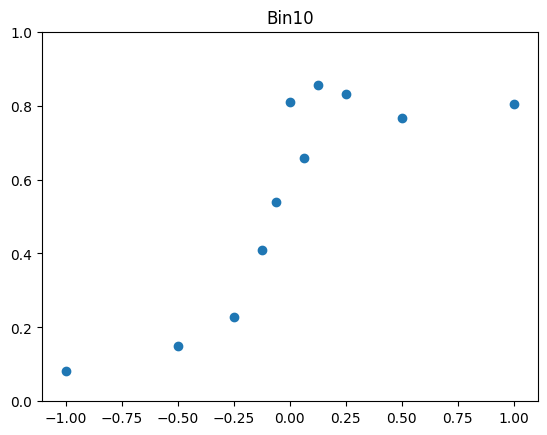

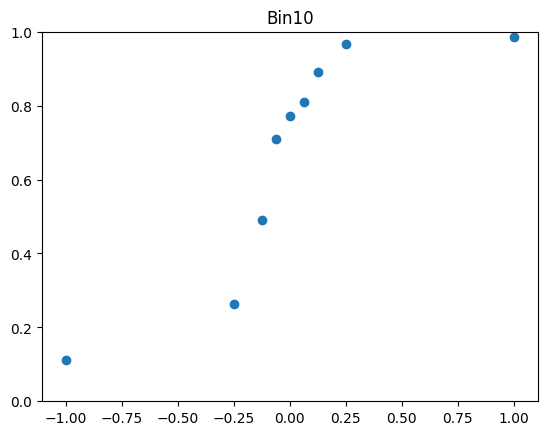

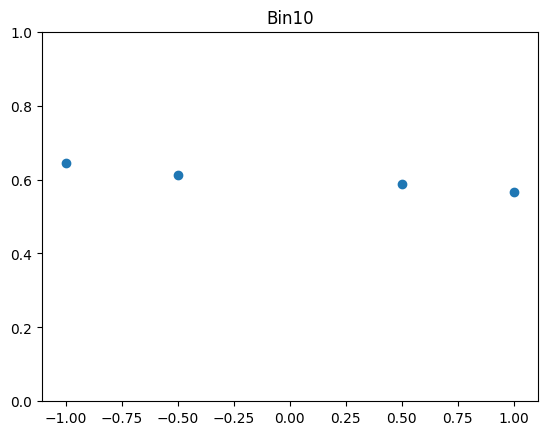

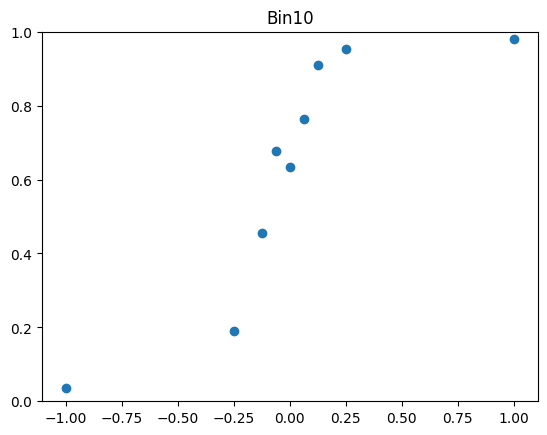

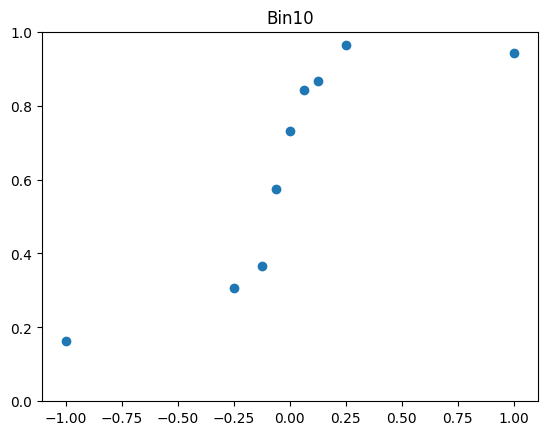

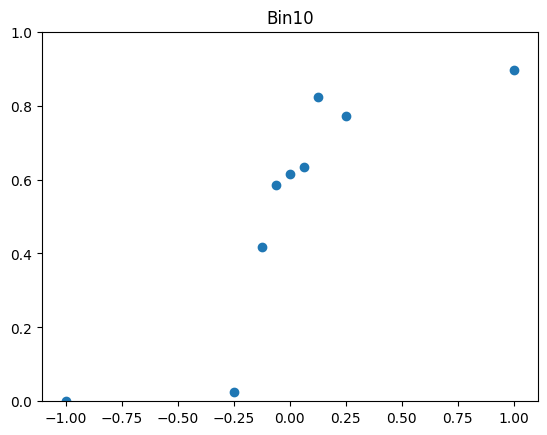

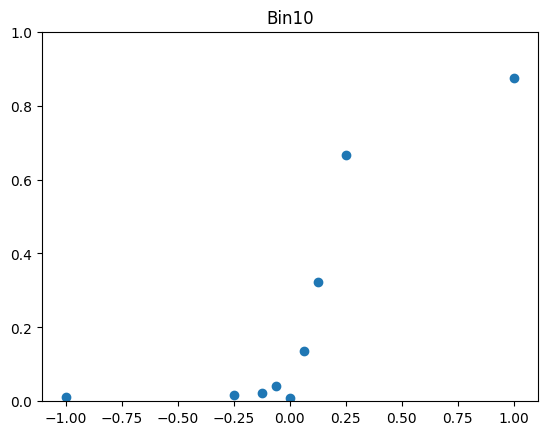

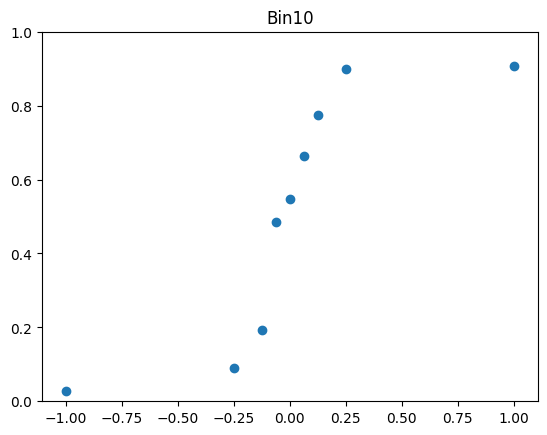

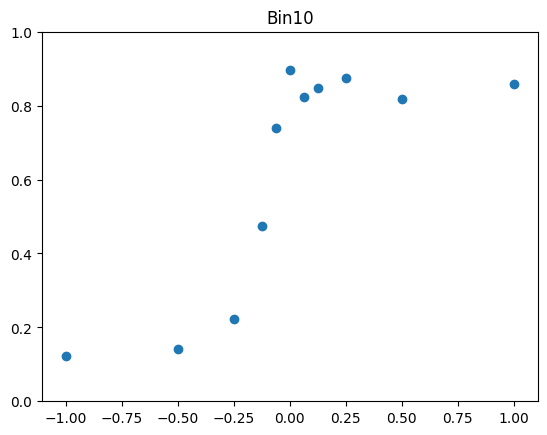

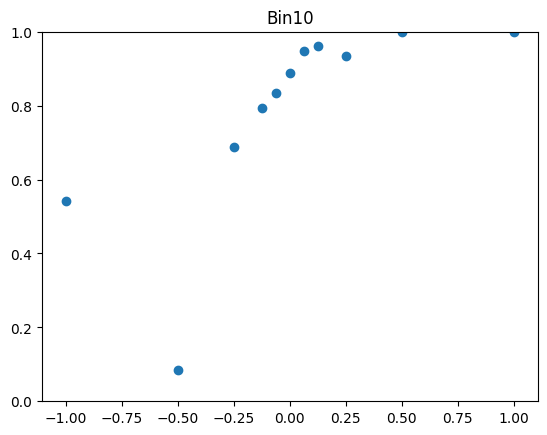

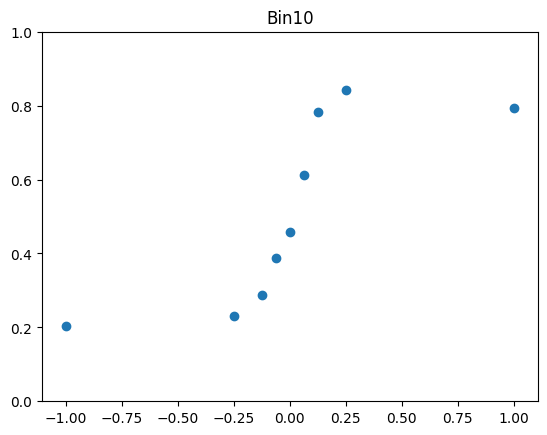

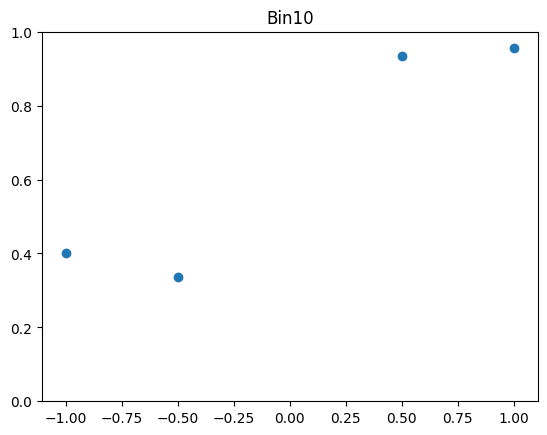

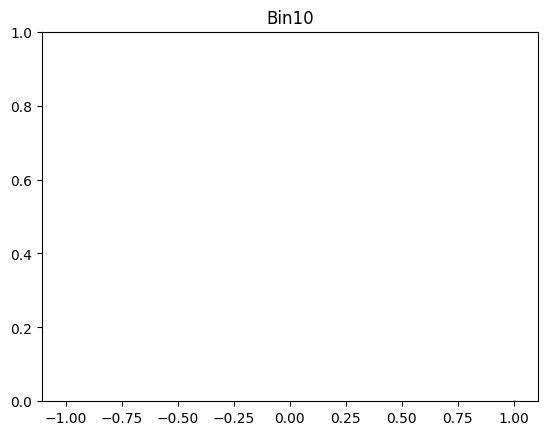

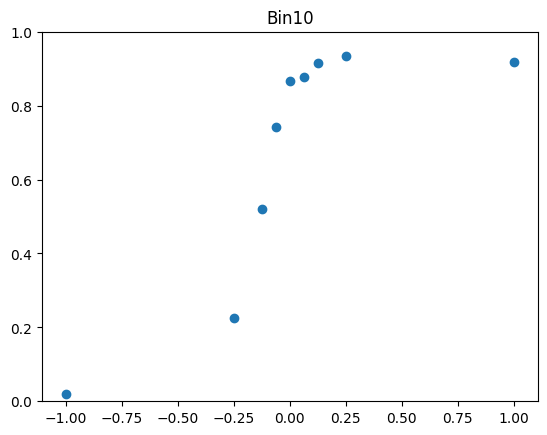

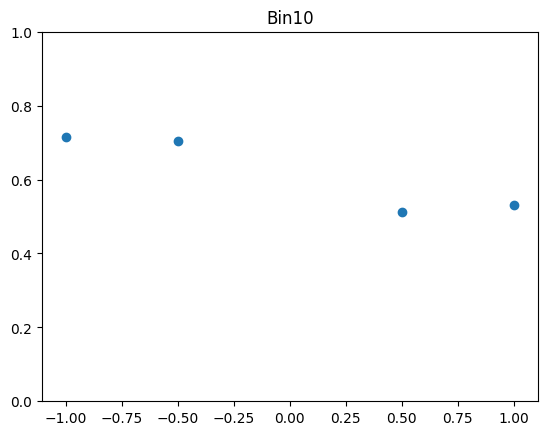

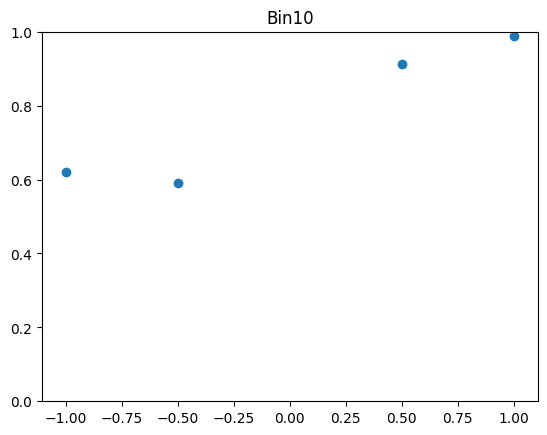

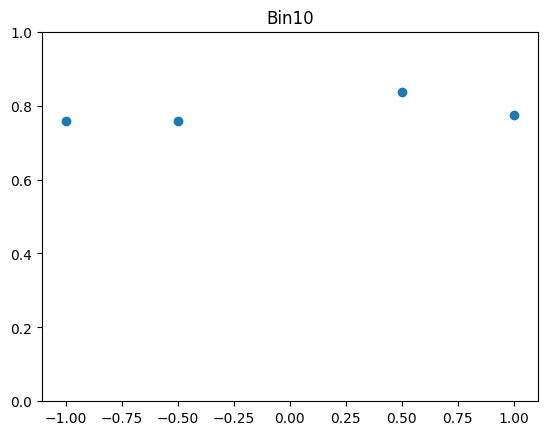

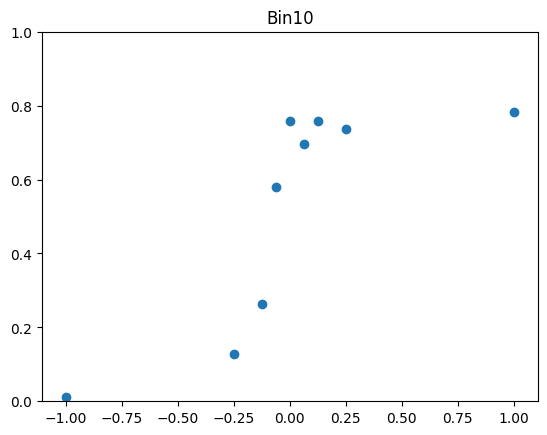

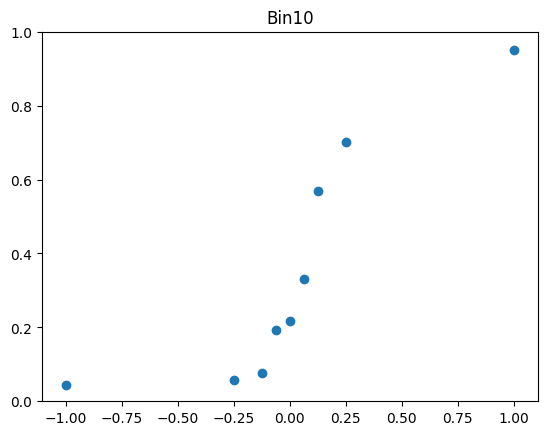

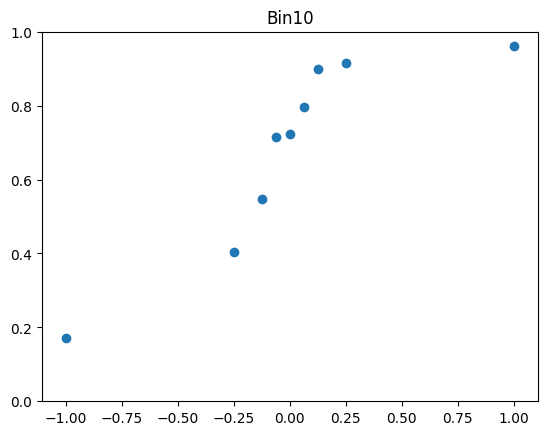

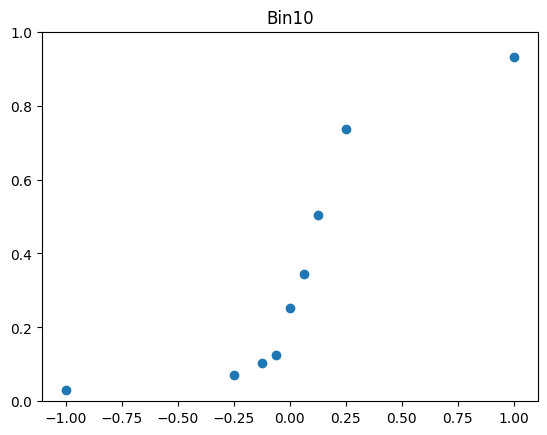

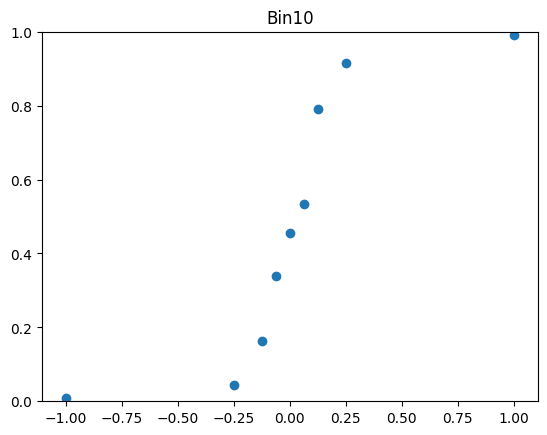

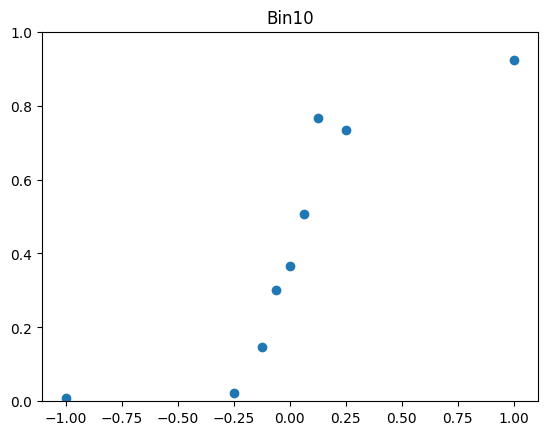

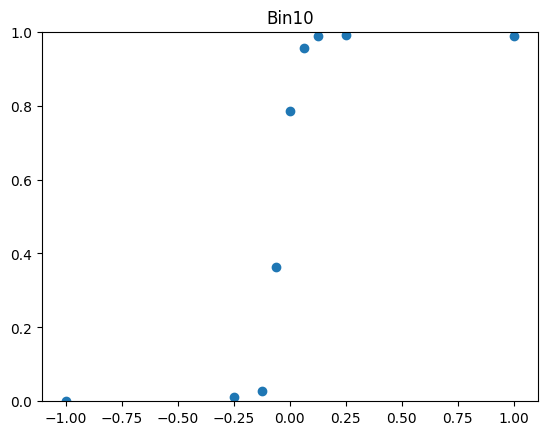

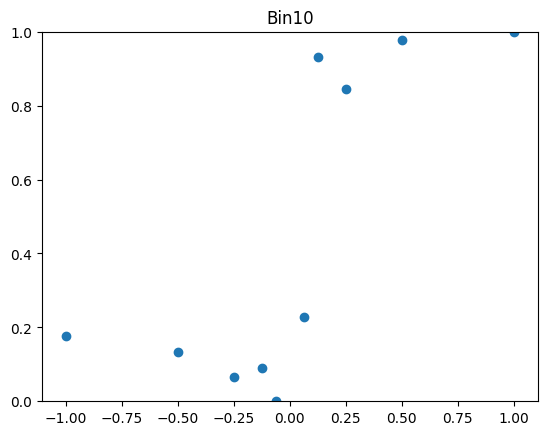

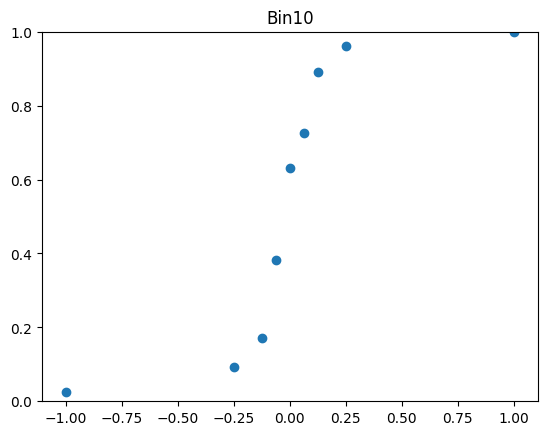

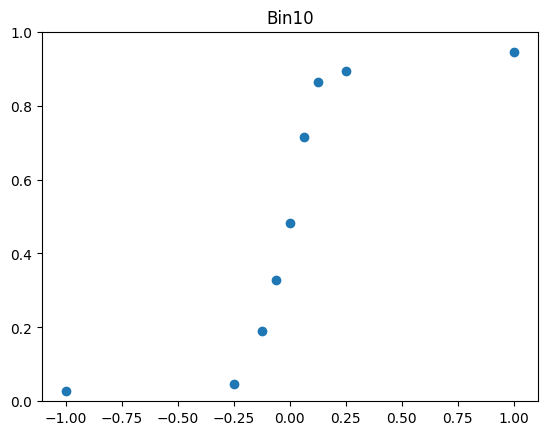

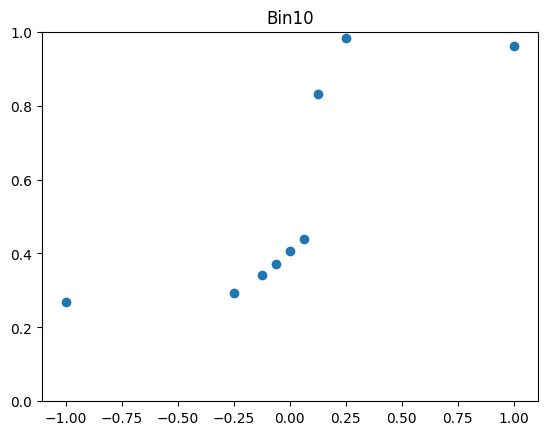

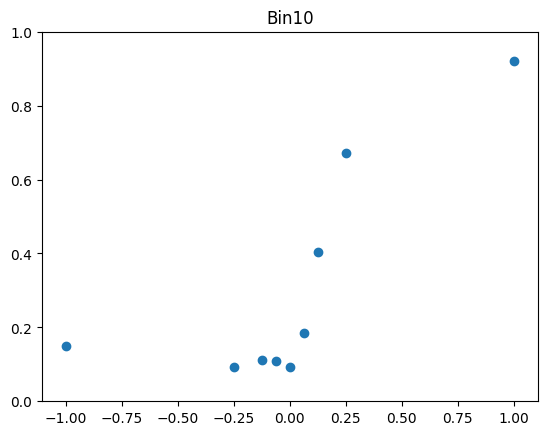

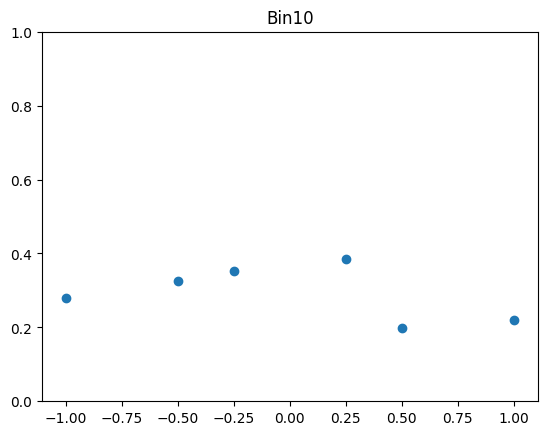

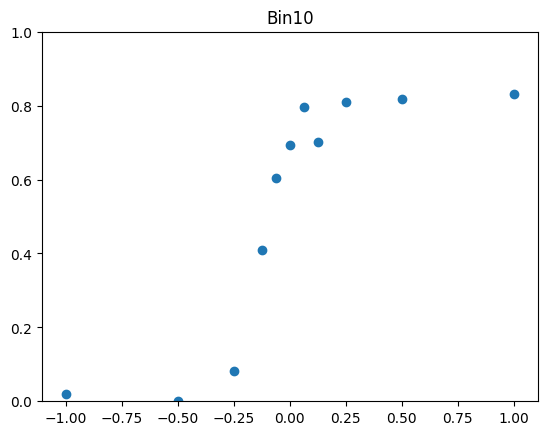

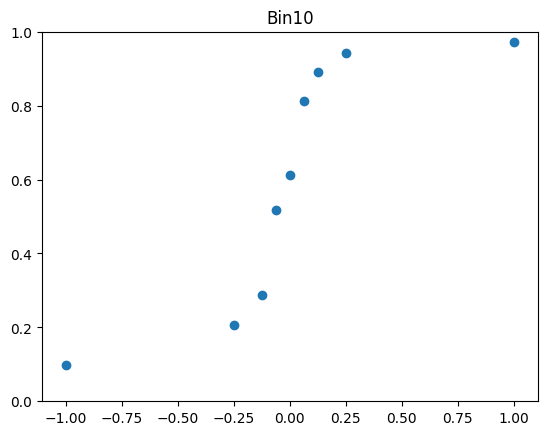

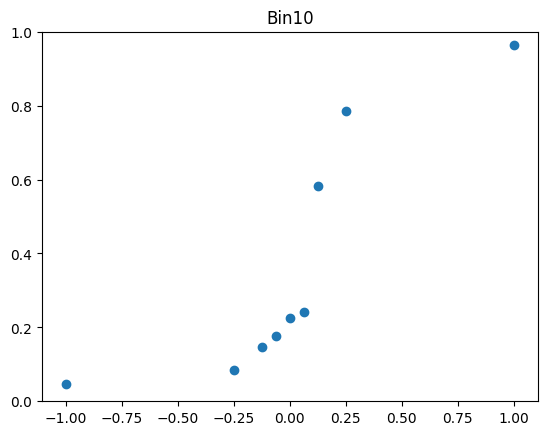

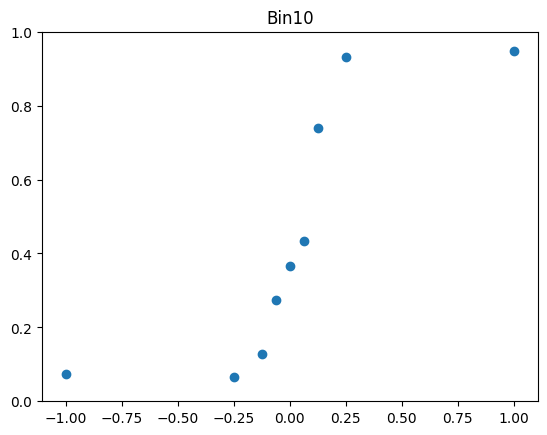

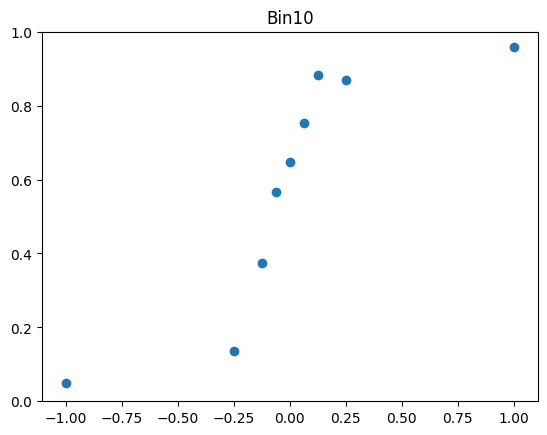

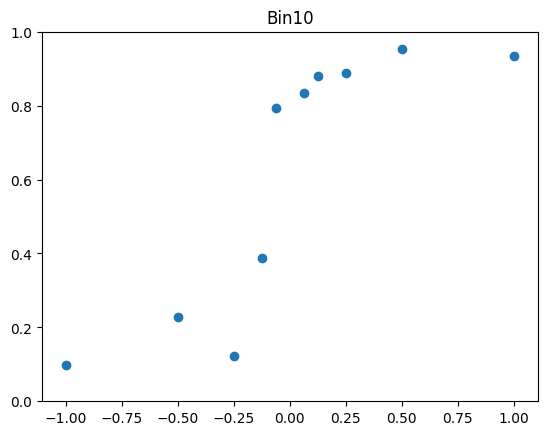

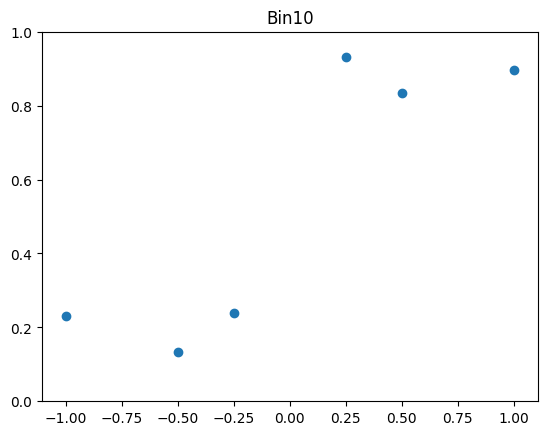

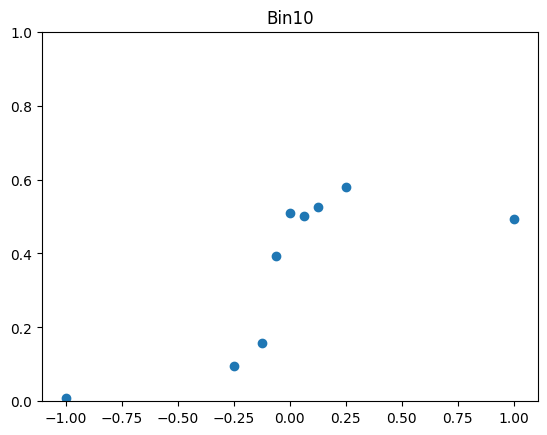

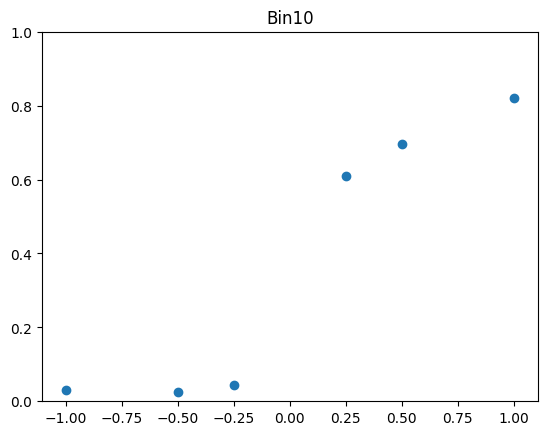

In [9]:
# Identify idx in master array where each animal's data starts and ends:
animal_start_idx = {}
animal_end_idx = {}

final_animal_eid_dict = defaultdict(list)
# WORKHORSE: iterate through each animal and each animal's set of eids;
# obtain unnormalized data.  Write out each animal's data and then also
# write to master array
for b, bin in enumerate(range(bin_num)):
        
    for z, animal in enumerate(animal_list):
        # Check if all data is available:
        #eid_path = one_local_rep_path + eid + '/alf'
        #dir_list = os.listdir(eid_path)
        animal, unnormalized_inpt, y, bin_arr, num_viols_50, rewarded = \
            get_all_unnormalized_data_this_session(
                animal, bin, all_trials)
        if num_viols_50 < 100:  # only include session if number of viols

            animal_unnormalized_inpt = np.copy(unnormalized_inpt)
            animal_y = np.copy(y)
            animal_bin = bin_arr
            animal_rewarded = np.copy(rewarded)
            final_animal_eid_dict[animal].append(str(bin+1))
            
        ## Check psychometric curves!
        #un_inpt, un_y, un_bin_data = load_data(unnormalized_data)
        import matplotlib.pyplot as plt
        plt.figure()
        x_stim = np.unique(unnormalized_inpt[:, 0])
        y_stim = np.zeros(len(x_stim))
        
        for s, stimulus in enumerate(x_stim):
            y_stim[s] = np.nanmean(y[np.where(unnormalized_inpt[:, 0]==stimulus), 0])
        plt.scatter(x_stim, y_stim)
        plt.title('Bin' + str(bin+1))
        plt.ylim([0,1])
                
        # Write out bin's unnormalized data matrix:
        np.savez(
            processed_ibl_data_path + 'data_by_bin/' + animal + '_' + str(bin+1) +
            '_unnormalized.npz',
            animal_unnormalized_inpt, animal_y,
            animal_bin)
        np.savez(
            processed_ibl_data_path + 'data_by_bin/' + animal + '_' + str(bin+1) +
            '_rewarded.npz',
            animal_rewarded)
        bin_shuffled_folds = create_train_test_sessions(animal_bin, num_folds=5)
        np.savez(
            processed_ibl_data_path + 'data_by_bin/' + animal + '_' + str(bin+1) +
            "_bin_fold_lookup" +
            ".npz",
            bin_shuffled_folds)
        
        assert animal_rewarded.shape[0] == animal_y.shape[0]

        # Now create or append data to master array across all animals for that bin:
        if z == 0:
            master_inpt = np.copy(animal_unnormalized_inpt)
            animal_start_idx[animal] = 0
            animal_end_idx[animal] = master_inpt.shape[0] - 1
            master_y = np.copy(animal_y)
            master_bin = animal_bin
            master_bin_fold_lookup_table = bin_shuffled_folds
            master_rewarded = np.copy(animal_rewarded)
        else:
            animal_start_idx[animal] = master_inpt.shape[0]
            master_inpt = np.vstack((master_inpt, animal_unnormalized_inpt))
            animal_end_idx[animal] = master_inpt.shape[0] - 1
            master_y = np.vstack((master_y, animal_y))
            master_bin = np.concatenate((master_bin, animal_bin))
            master_bin_fold_lookup_table = np.hstack(
                (master_bin_fold_lookup_table, bin_shuffled_folds))  # Changed vstack into hstack
            master_rewarded = np.vstack((master_rewarded, animal_rewarded))
            

    # After looping through animals, write out data from across animals for that bin
    assert np.shape(master_inpt)[0] == np.shape(master_y)[
        0], "inpt and y not same length"
    assert np.shape(master_rewarded)[0] == np.shape(master_y)[
        0], "rewarded and y not same length"

    # Normalize across animals
    normalized_inpt = np.copy(master_inpt)
    normalized_inpt[:, 0] = preprocessing.scale(normalized_inpt[:, 0])
    np.savez(processed_ibl_data_path + 'all_animals_concat' + '_bin_' + str(bin+1) + '.npz',
                normalized_inpt,
                master_y, master_bin)
    np.savez(
        processed_ibl_data_path + 'all_animals_concat_unnormalized' + '_bin_' + str(bin+1) + '.npz',
        master_inpt, master_y, master_bin)
    np.savez(
        processed_ibl_data_path + 'all_animals_concat_session_fold_lookup' + '_bin_' + str(bin+1) +
        '.npz',
        master_bin_fold_lookup_table)
    np.savez(processed_ibl_data_path + 'all_animals_concat_rewarded' + '_bin_' + str(bin+1) + '.npz',
                master_rewarded)
    np.savez(processed_ibl_data_path + 'data_by_bin/' + 'animal_list_bin_' + str(bin+1) +'.npz',
                animal_list)
    import json
    json = json.dumps(final_animal_eid_dict)
    f = open(processed_ibl_data_path + "final_animal_eid_dict" + '_bin_' + str(bin+1) + ".json", "w")
    f.write(json)
    f.close()
    
    # Now write out normalized data (when normalized across all animals) for
    # each animal:
    counter = 0
    for animal in animal_start_idx.keys():
        start_idx = animal_start_idx[animal]
        end_idx = animal_end_idx[animal]
        inpt = normalized_inpt[range(start_idx, end_idx + 1)]
        y = master_y[range(start_idx, end_idx + 1)]
        binn = master_bin[range(start_idx, end_idx + 1)]
        counter += inpt.shape[0]
        np.savez(processed_ibl_data_path + 'data_by_bin/' + animal + '_bin_' + str(bin+1) + '_processed.npz',
                    inpt, y,
                    binn)

    assert counter == master_inpt.shape[0]
